### Convolutional layer?
- Convolutional Layers are made up of filters

### Code Example
Lets go through one code example to understand "Filters" and "Convolution"
When the feature is present in part of an image, the convolutional operation between the filter and the part of the image results in a real number with a high value. If the feature is not present, the resulting value is low

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
def drawingImg(img,title="Image"):
    plt.style.use("seaborn")
    plt.imshow(img)
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

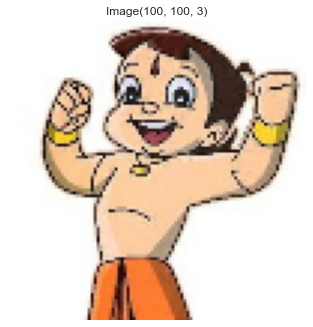

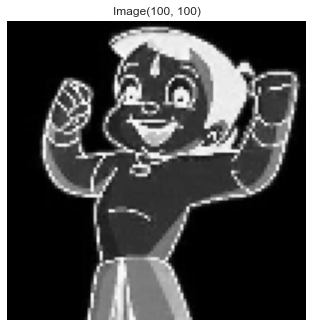

In [16]:
img_ = cv2.imread("./cody2.jpeg")
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_ = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img_,cv2.COLOR_RGB2GRAY)
drawingImg(img_)
drawingImg(img_gray)

In [17]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                if(new_img[row][col]>255):
                    new_img[row][col] = 255
                elif new_img[row][col]<0:
                    new_img[row][col] = 0
    return new_img  

In [18]:
blur_filter = np.ones((3,3))/9.0

In [19]:
output1 = convolution(img_gray,blur_filter)

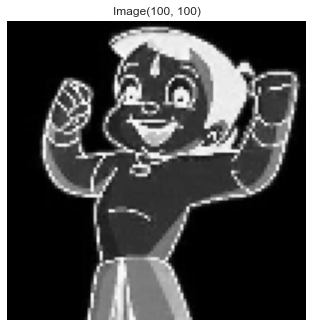

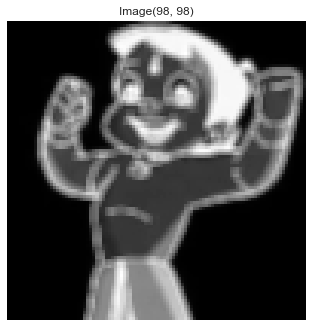

In [22]:
drawingImg(img_gray)
drawingImg(output1)

In [23]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

output2 = convolution(img_gray,edge_filter)

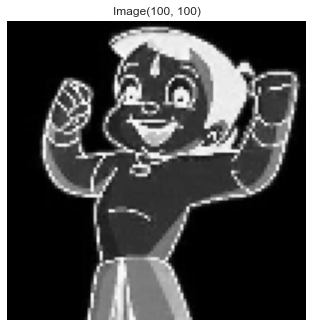

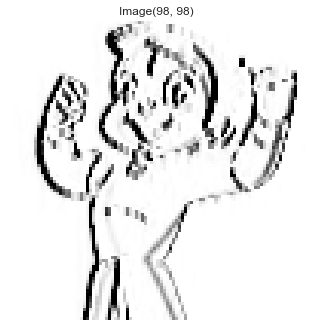

In [24]:
drawingImg(img_gray)
drawingImg(output2)

### Extracting Features of Imae using Filters 

## Convolutinal Layer
- contain various filters
- each filter extracts different kind of features and gives 1 activation map
- multiple activation maps are continued by stacking to form output volume
- so CNN layer takes input a volume and produces an output volume of different shape

### Buzzwords in CNN's
- Convolutional Layer
- Valid vs Same Convolution
- Padding
- Stride
- Filters/Kernels
- Pooling( Average/Maxpooling)

### Padding Example
Padding is done to keep the size of output image the same sa that of the input size.
For this the 2 row/col are added to the all the sides of input image so that the size of output image remain same

In [26]:
print(img_.shape)

(100, 100, 3)


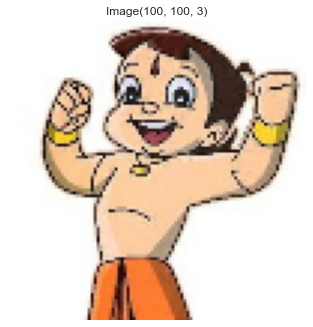

In [27]:
drawingImg(img_)

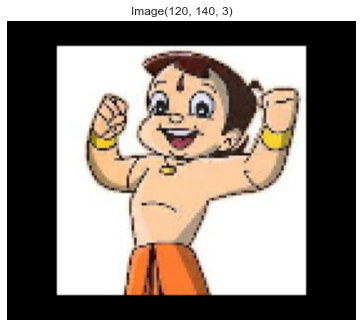

In [31]:
pad_img = np.pad(img_,((10,10),(20,20),(0,0)),'constant',constant_values=0)
drawingImg(pad_img)
# 2 paramater is for how much we want to give in each dimension
# 3rd parameter for what type of value should be given in padding constant or someting else
# 4th parameter for the values of the constant
# If we make contant_values=255 then it will give white padding to the image

### Stride
- Filter can have different size as well as movement
- Stride defines how a filter should move across the image
- No of pixels we skip each time is called a stride
- In our example we used a stride of (1,1) along W and H
- You can also use a stride of (2,2) in that case the output volume will have less W and H

**Output sizes: new_H = (H-F)/S +1,   new_W = (W-F)/S +1**
 where S is the stride

### Padding
- Convolutional opertation we have seen reduces "H" and "W" of original image
- But sometimes we want the output image to have same size as input image
- So we can achieve thsi by adding 0 value pixels(neurons) outside the original image
- This is called Padding
**Output Sizes : new_H = (H-F+2 * pad)/S +1, new_W = (W-F+2 * pad)/S +1**
where pad is the amount of padding we want

for S=1 pad is 1 but for some other value it depends on the value of S

### Pooling Layers
- Polling is performed after Convolution Operation
- Two types of pooling layers - Average Pooling and Max Pooling
- **Max-pooling layer**: slides an (f,f) window over the input and stores the max value of the window in the ouput.
- **Average- pooling layer**: slides an (f,f) window over the input and stores the average value of window in output.
- It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
- Makes feature dectors more robust
- No parameters for learning only hyperparameters such as filter size and type of pooling.

In [10]:
import numpy as np
X = np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])
#Max pooling is generally used more than average pooling

def pooling(X,mode="max"):
    stride = 2
    f=2
    
    H,W = X.shape
    HO = (H-f)//stride + 1
    WO = (W-f)//stride + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if(mode=="max"):
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
        
    return output

In [11]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
